### Challenge questions

Easy questions:

 1. How many total pings are in the Ocearch shark data?
 2. How many unique species of sharks are in the data set?
 3. What is the name, weight, and species of the heaviest shark(s)?
 4. When and where was the very first ping?
 5. Excluding results with 0 distance traveled: what's the minimum, average, and maximum travel distances?
 
Intermediate questions:

 1. Which shark had the most pings?
 2. Which shark has been pinging the longest, and how long has that been?
 3. Which shark species has the most individual sharks tagged?
 4. What is the average length and weight of each shark species?
 5. Which shark has the biggest geographic box (largest distance from min lat/lon to max lat/lon, not dist_traveled)?
 

### Load data

In [3]:
import pandas as pd
df = pd.read_csv('data/sharks.csv')
df.shape

(65793, 12)

#### Clean data

In [17]:
#cleans datetime

df['datetime'] = pd.to_datetime(df['datetime'])
df.datetime[0]

#cleans weight

def clean_weight(value):
    if not value:
        return value
    # most values are like "123 lb"
    value = str(value)
    for character in 'lbs,+':
        value = value.replace(character, '')
    return float(value)

#cleans length

def clean_length(value):
    if not value:
        return value
    # most length values are like '3 ft 4 in.'
    value = str(value)
    total = 0
    if 'ft' in value:
        ft, inches = value.split('ft')
        total += int(ft.strip()) * 12
    else:
        inches = value
    if inches.strip():
        total += float(inches.strip().split()[0])
    return total

df['weight'] = df.weight.apply(clean_weight)
df['length'] = df.length.apply(clean_length)

numeric_cols = ['latitude', 'longitude', 'dist_total', 'weight', 'length']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, axis=1)
df.head()

,active,datetime,id,latitude,longitude,name,gender,species,weight,length,tagDate,dist_total
0,1,2014-07-06 04:57:28,3,-34.606610,21.152440,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
1,1,2014-06-23 02:40:09,3,-34.787520,19.424790,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
2,1,2014-06-15 13:15:44,3,-34.424870,21.097540,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
3,1,2014-06-03 02:23:57,3,-34.704323,20.210134,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
4,1,2014-05-28 19:53:57,3,-34.655560,19.374590,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662


### Explore data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 12 columns):
active        65793 non-null int64
datetime      65793 non-null datetime64[ns]
id            65793 non-null int64
latitude      65793 non-null float64
longitude     65793 non-null float64
name          65793 non-null object
gender        65647 non-null object
species       65793 non-null object
weight        60385 non-null float64
length        65220 non-null float64
tagDate       65793 non-null object
dist_total    65793 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 6.0+ MB


In [14]:
df.describe()

,active,id,latitude,longitude,weight,length,dist_total
count,65793.0,65793.000000,65793.000000,65793.000000,60385.000000,65220.000000,65793.000000
mean,1.0,119.909990,9.703767,-35.911564,971.543797,120.537649,12567.781934
std,0.0,91.296923,31.761692,59.129796,1724.847731,39.936945,12754.985808
min,1.0,3.000000,-45.624150,-103.968670,30.900000,35.000000,0.000000
25%,1.0,38.000000,-28.398860,-75.472510,200.000000,90.000000,3048.274000
50%,1.0,98.000000,27.954280,-68.398400,409.000000,115.000000,8177.352000
75%,1.0,202.000000,38.188230,20.976100,1337.000000,151.000000,17811.853000
max,1.0,326.000000,53.658430,155.854300,25000.000000,360.000000,46553.182000


In [16]:
df.head()

,active,datetime,id,latitude,longitude,name,gender,species,weight,length,tagDate,dist_total
0,1,2014-07-06 04:57:28,3,-34.606610,21.152440,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
1,1,2014-06-23 02:40:09,3,-34.787520,19.424790,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
2,1,2014-06-15 13:15:44,3,-34.424870,21.097540,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
3,1,2014-06-03 02:23:57,3,-34.704323,20.210134,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662
4,1,2014-05-28 19:53:57,3,-34.655560,19.374590,Oprah,Female,White Shark (Carcharodon carcharias),686.0,118.0,7 March 2012,2816.662


In [18]:
df.datetime[0]

Timestamp('2014-07-06 04:57:28')

#### Intermediate questions

 1. Which shark had the most pings?
 2. Which shark has been pinging the longest, and how long has that been?
 3. Which shark species has the most individual sharks tagged?
 4. What is the average length and weight of each shark species?
 5. Which shark has the biggest geographic box (largest distance from min lat/lon to max lat/lon, not dist_traveled)?

##### Most pings
Which shark had the most pings?

In [ ]:
Mary Lee, 3240 pings

In [53]:
pingcount = df.groupby('id').size().sort_values(ascending=False)
df[df.id == 41]
pingcount.head()

id
41     3240
56     2946
202    2366
60     2134
32     1851
dtype: int64

##### Longest duration pinger
Which shark has been pinging the longest, and how long has that been?

In [ ]:
Katharine, 1972 days

In [50]:
firstname = df.groupby('id').name.first()
species = df.groupby('id').species.first()
firstping = df.groupby('id').datetime.min()
lastping = df.groupby('id').datetime.max()
lastping.head()

id
3   2014-07-06 04:57:28
4   2014-06-26 22:33:40
5   2017-01-05 05:22:39
6   2012-10-18 21:16:44
7   2012-10-09 15:02:00
Name: datetime, dtype: datetime64[ns]

In [58]:
pingsummaries = pd.concat([firstname,species,pingcount,firstping,lastping], axis=1).reset_index()
pingsummaries.columns = ['id','name','species','pings','first ping','last ping']
pingsummaries.sort_values(by='pings',ascending=False).head()

,id,name,species,pings,first ping,last ping
35,41,Mary Lee,White Shark (Carcharodon carcharias),3240,2012-09-18 09:34:28,2017-06-17 10:54:32
36,56,Lydia,White Shark (Carcharodon carcharias),2946,2013-03-03 08:03:13,2017-03-15 02:31:34
154,202,Oscar,Mako Shark (Isurus oxyrinchus),2366,2016-07-09 00:14:38,2019-01-29 20:32:35
40,60,April,Mako Shark (Isurus oxyrinchus),2134,2013-07-28 17:00:04,2014-06-17 11:17:03
26,32,Lisha,White Shark (Carcharodon carcharias),1851,2012-05-14 15:43:21,2014-04-03 12:48:57


In [69]:
pingsummaries['duration'] = pingsummaries['last ping'] - pingsummaries['first ping']
longestpinging = pingsummaries.sort_values(by='duration',ascending=False)
longestpinging.head()

,id,name,species,pings,first ping,last ping,duration
45,65,Katharine,White Shark (Carcharodon carcharias),1816,2013-08-21 04:42:26,2019-01-14 23:49:00,1972 days 19:06:34
2,5,Helen,White Shark (Carcharodon carcharias),204,2012-03-10 15:15:10,2017-01-05 05:22:39,1761 days 14:07:29
35,41,Mary Lee,White Shark (Carcharodon carcharias),3240,2012-09-18 09:34:28,2017-06-17 10:54:32,1733 days 01:20:04
36,56,Lydia,White Shark (Carcharodon carcharias),2946,2013-03-03 08:03:13,2017-03-15 02:31:34,1472 days 18:28:21
19,25,Cyndi,White Shark (Carcharodon carcharias),1578,2012-04-14 15:50:25,2015-09-21 15:00:43,1254 days 23:10:18


##### Individual count by species
Which shark species has the most individual sharks tagged?

In [ ]:
Tiger Shark, 82

In [130]:
individualtags = pingsummaries.groupby('species').id.nunique()
individualtags.sort_values(ascending=False)

species
Tiger Shark  (Galeocerdo cuvier)          82
White Shark (Carcharodon carcharias)      74
Blue Shark (Prionace glauca)              27
Mako Shark (Isurus oxyrinchus)            18
Hammerhead Shark (Sphyrna)                18
Blacktip Shark (Carcharhinus limbatus)     9
Silky Shark (Carcharhinus falciformis)     4
Bull Shark (Carcharhinus leucas)           4
Whale Shark (Rhincodon Typus)              3
Name: id, dtype: int64

##### Average length/weight by species
What is the average length and weight of each shark species?

In [ ]:
See below

In [82]:
df.groupby('species').agg({'weight':'mean','length':'mean'})

,weight,length
species,,
Blacktip Shark (Carcharhinus limbatus),138.378910,80.316209
Blue Shark (Prionace glauca),243.634091,106.028852
Bull Shark (Carcharhinus leucas),290.400000,89.781022
Hammerhead Shark (Sphyrna),126.532226,93.813093
Mako Shark (Isurus oxyrinchus),240.451871,82.446834
Silky Shark (Carcharhinus falciformis),132.881671,76.965197
Tiger Shark (Galeocerdo cuvier),467.917390,119.175229
Whale Shark (Rhincodon Typus),25000.000000,327.906977
White Shark (Carcharodon carcharias),1555.265789,147.144227


##### Biggest geographic box
Which shark has the biggest geographic box (largest area calculated from min lat/lon to max lat/lon, not dist_traveled)?

In [ ]:
Kathryn, 1851.608381

In [97]:
geographicbox = df.groupby('id')
geoboxdf = pd.concat([geographicbox.latitude.min(),geographicbox.latitude.max(),
                      geographicbox.longitude.min(),geographicbox.longitude.max()],
                    axis=1)
geoboxdf.columns = ['minlat','maxlat','minlong','maxlong']
geoboxdf.head()

,minlat,maxlat,minlong,maxlong
id,,,,
3,-34.88268,-34.05394,19.374590,22.64236
4,-36.70300,-34.06300,20.535038,22.74626
5,-37.23623,-19.50057,18.536350,37.84922
6,-34.98600,-24.77363,19.061580,34.84301
7,-35.46100,-32.74300,17.916810,27.97646


In [110]:
geoboxdf['latchange'] = geoboxdf['maxlat'] - geoboxdf['minlat']
geoboxdf['longchange'] = geoboxdf['maxlong'] - geoboxdf['minlong']
geoboxdf.head()
geoboxdf['area'] = geoboxdf['latchange'] * geoboxdf['longchange']
geoboxdf.sort_values(by='area',ascending=False).head()
#df[df.id == 35].head()

,minlat,maxlat,minlong,maxlong,latchange,longchange,area
id,,,,,,,
35,-41.37174,-6.15888,18.51500,71.09830,35.21286,52.58330,1851.608381
56,23.53902,53.65843,-81.38180,-27.48272,30.11941,53.89908,1623.408489
30,-43.21756,-19.11709,8.06196,66.72966,24.10047,58.66770,1413.919144
25,-45.61157,-14.95129,18.23305,61.87323,30.66028,43.64018,1338.020138
36,-38.82461,-10.52038,17.47565,62.65514,28.30423,45.17949,1278.770676


#### Plotting

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
longestpinging['days'] = [d.days for d in longestpinging['duration']]

In [137]:
species = list(df.species.unique())
raw_colours = ['ff5733', 'ea8b1e', 'fef65b', '8bef23', '24f0db', '2684da', '856145', '9c43d1', 'ef40e1']
colours = ["#" + c for c in raw_colours]
species_colour_dict = {species[i]:colours[i] for i in range(0, len(species))}

longestpinging['colour'] = longestpinging['species'].map(species_colour_dict)

In [138]:
longestpinging.head()

,id,name,species,pings,first ping,last ping,duration,days,colour
45,65,Katharine,White Shark (Carcharodon carcharias),1816,2013-08-21 04:42:26,2019-01-14 23:49:00,1972 days 19:06:34,1972,#ff5733
2,5,Helen,White Shark (Carcharodon carcharias),204,2012-03-10 15:15:10,2017-01-05 05:22:39,1761 days 14:07:29,1761,#ff5733
35,41,Mary Lee,White Shark (Carcharodon carcharias),3240,2012-09-18 09:34:28,2017-06-17 10:54:32,1733 days 01:20:04,1733,#ff5733
36,56,Lydia,White Shark (Carcharodon carcharias),2946,2013-03-03 08:03:13,2017-03-15 02:31:34,1472 days 18:28:21,1472,#ff5733
19,25,Cyndi,White Shark (Carcharodon carcharias),1578,2012-04-14 15:50:25,2015-09-21 15:00:43,1254 days 23:10:18,1254,#ff5733


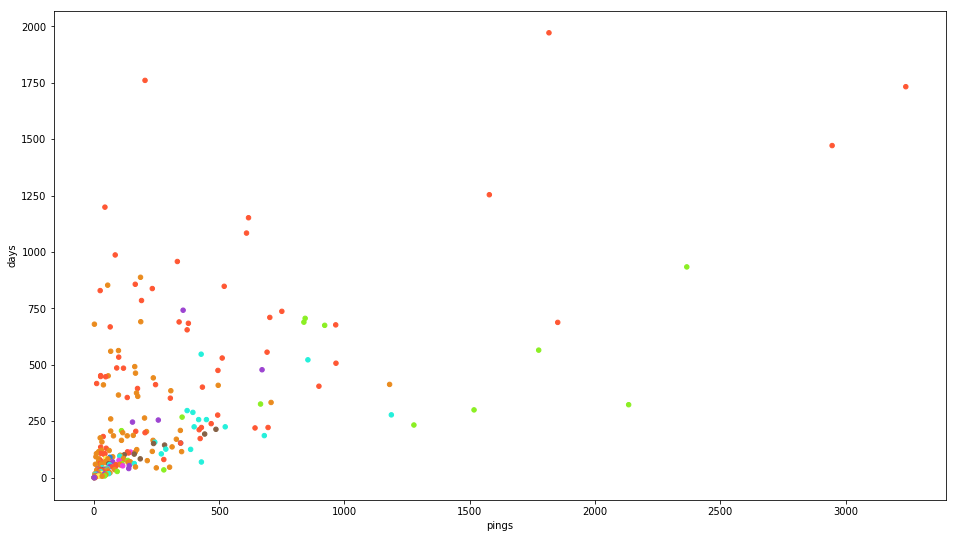

In [143]:
longestpinging.plot.scatter(figsize=(16,9),x='pings',y='days',color=longestpinging.colour)